In [1]:
import numpy
import random
from pandas import DataFrame
from typing import List
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans , AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plotter

#shift + enter : to run the cell (choose the one first)

In [2]:
def generate_uniform_dataset(n_data_points = 100,
                             feature_range: int = 1.0,
                             random_state: int = None):
    if random_state is None :
        random_state = int(random.random() * 100)
    return numpy.random.RandomState(random_state).uniform(0,
                                                          feature_range,
                                                          size=(n_data_points, 2))

In [3]:
def generate_blobbed_dataset(n_data_points=100,
                             feature_range: int= 1.0,
                             n_blobs : int = 3,
                             blob_std: float = None,
                             blob_centers: List[List[float]] = None,
                             size_blobs: List[int] = None,
                             random_state: int = None):
    if random_state is None :
        random_state = int(random.random() * 100)
    if blob_std is None :
        random.random()* 0.2 * feature_range
    if blob_centers is None :
        blob_centers = [[random.random() * feature_range,
                         random.random() * feature_range] for x in range(n_blobs)]
    if size_blobs is None :
        size_blobs = [int(random.random() * 10) for x in range(n_blobs)]

    blob_samples = []

    for blob_counter in range(len(size_blobs)):
        blob_samples.append(n_data_points * size_blobs[blob_counter] // sum(size_blobs))
    return make_blobs(n_samples=blob_samples,
                      cluster_std=blob_std,
                      centers=blob_centers,
                      random_state=random_state)[0]

In [4]:
# generating data
data_points = 200

In [5]:
uniform_dataset = DataFrame(data = generate_uniform_dataset(data_points),
                            columns = ['X','Y'])
blobbed_dataset = DataFrame(data = generate_blobbed_dataset(n_data_points = data_points,
                                                            n_blobs = 4,
                                                            blob_std = 0.1,
                                                            blob_centers = [[0.7, 0.2],
                                                                            [0.2, 0.1],
                                                                            [0.3, 0.8],
                                                                            [0.9, 0.9]],
                                                            size_blobs = [2,
                                                                      3,
                                                                      5,
                                                                      7]),
                            columns = ['X','Y'])

In [6]:
print(uniform_dataset)

            X         Y
0    0.944497  0.464098
1    0.192795  0.581895
2    0.620084  0.684224
3    0.103438  0.745476
4    0.281979  0.753425
..        ...       ...
195  0.400263  0.537652
196  0.304640  0.481447
197  0.505360  0.165640
198  0.153005  0.167999
199  0.459461  0.608922

[200 rows x 2 columns]


In [15]:
num_clust = 3
data1= uniform_dataset

In [16]:
modelle_k_ile = KMeans(num_clust)
modelle_k_ile.fit(data1)
set_label = modelle_k_ile.predict(data1)
center = modelle_k_ile.cluster_centers_
kMeans = DataFrame(set_label)
data1.insert((data1.shape[1]),'kmeans',kMeans)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


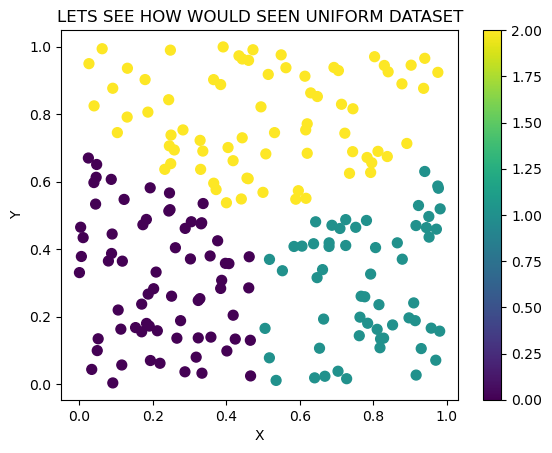

In [25]:
fig = plotter.figure()
ax= fig.add_subplot(111)
scatter = ax. scatter(data1['X'],data1['Y'], c = kMeans[0], s=50)
ax.set_title('LETS SEE HOW WOULD SEEN UNIFORM DATASET')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plotter.colorbar(scatter)

In [7]:
print(blobbed_dataset)

            X         Y
0    0.730803  0.961645
1    0.197409  0.128909
2    0.195117  0.139334
3    1.021718  0.918265
4    1.061146  0.923934
..        ...       ...
193  0.337775  0.961441
194  0.231475  0.346765
195  0.277005  0.687045
196  0.313314  0.920274
197  0.186952  0.605870

[198 rows x 2 columns]


In [8]:
number_of_cluster = 2
data_in = blobbed_dataset

In [9]:
model_kmeans = KMeans(number_of_cluster)
model_kmeans.fit(data_in) #küme merkezini bulma 
clust_labels = model_kmeans.predict(data_in) #label: küme etiketi / predict: hamgi veri noktası hangi kümeye ait
cent = model_kmeans.cluster_centers_
kmeans = DataFrame(clust_labels)
data_in.insert((data_in.shape[1]),'kmeans',kmeans)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


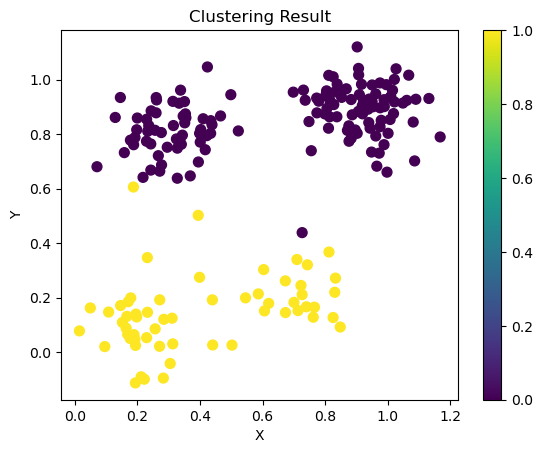

In [10]:
fig = plotter.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data_in['X'], data_in['Y'],
                     c = kmeans[0], s = 50)
ax.set_title('Clustering Result')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plotter.colorbar(scatter)

In [11]:
number_of_clusters_agg = 4
data_in_agg = blobbed_dataset

In [12]:
model_agg = AgglomerativeClustering(n_clusters=number_of_clusters_agg, metric = 'euclidean', linkage = 'ward')
clust_labels_agg = model_agg.fit_predict(data_in_agg)

#neden bir seferde fit predict yaptık açıklamasına baktın göz at baştan!

agglomerative = DataFrame(clust_labels_agg)
data_in_agg.insert((data_in_agg.shape[1]),'agglomerative',agglomerative)

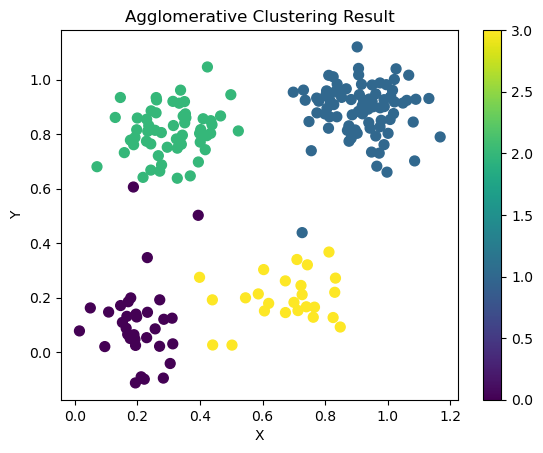

In [28]:
fig = plotter.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data_in_agg['X'],data_in_agg['Y'],
                      c= agglomerative[0], s=50)
ax.set_title('Agglomerative Clustering Result')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plotter.colorbar(scatter)

In [29]:
number_of_clusters_gmm = 3
data_in_gmm = blobbed_dataset

In [35]:
model_gmm = GaussianMixture(n_components=number_of_clusters_gmm, init_params='kmeans')
model_gmm.fit(data_in_gmm)
clust_labels_gmm = model_gmm.predict(data_in_gmm)

gmm= DataFrame(clust_labels_gmm)
data_in_gmm.insert(data_in_gmm.shape[1], 'gmm', gmm)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
fig = plotter.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data_in_gmm['X'], data_in_gmm['Y'],
                    c= gmm[0], s=50)
ax.set_title('Gaussian')